In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import logging 
import math
from vanet_tools import plot_microclouds,Block,Node,Microcloud,create_coords,simulation

In [2]:
df = pd.read_csv("manhattan_out.csv",delimiter=";").dropna()

In [3]:
car_groups = df.sort_values(by='timestep_time').groupby('vehicle_id')

In [3]:
CARS = df['vehicle_id'].unique()

In [4]:
len(CARS)

3600

In [5]:
car0_df = car_groups.get_group(CARS[0])
car0_df.head()

,timestep_time,vehicle_angle,vehicle_id,vehicle_lane,vehicle_pos,vehicle_slope,vehicle_speed,vehicle_type,vehicle_x,vehicle_y
0,0.0,270.0,0.0,4/6to3/6_0,5.10,0.0,0.00,DEFAULT_VEHTYPE,790.15,1201.65
1,1.0,270.0,0.0,4/6to3/6_0,6.54,0.0,1.44,DEFAULT_VEHTYPE,788.71,1201.65
3,2.0,270.0,0.0,4/6to3/6_0,9.66,0.0,3.12,DEFAULT_VEHTYPE,785.59,1201.65
6,3.0,270.0,0.0,4/6to3/6_0,14.73,0.0,5.08,DEFAULT_VEHTYPE,780.52,1201.65
10,4.0,270.0,0.0,4/6to3/6_0,21.44,0.0,6.71,DEFAULT_VEHTYPE,773.81,1201.65


In [6]:
coordinates = df[['vehicle_x','vehicle_y']]

In [7]:
coordinates.sample().get_values()[0]

array([674.26, 798.35])

In [8]:
coords_x,coords_y = coordinates['vehicle_x'],coordinates['vehicle_y']

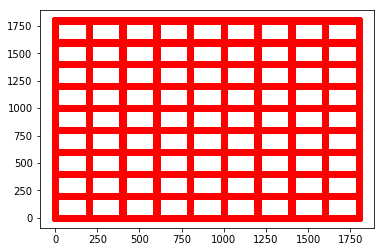

In [9]:
plt.scatter(coords_x,coords_y,c='red')
plt.show()

In [10]:
MICROCLOUD_RANGE=150
NUM_MICROCLOUDS = 50

In [11]:
MICROCLOUD_COORDS = create_coords(coordinates,MICROCLOUD_RANGE,num_microclouds=NUM_MICROCLOUDS)

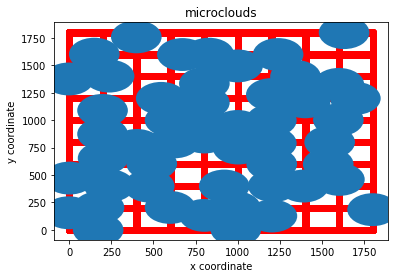

In [12]:
plot_microclouds(MICROCLOUD_COORDS,MICROCLOUD_RANGE,coords_x,coords_y)

In [13]:
logging.getLogger().setLevel(logging.DEBUG)
result = simulation(MICROCLOUD_COORDS,MICROCLOUD_RANGE,[CARS[0]],car_groups)

INFO:root:Finished setup started simulation with 50 microclouds
DEBUG:root:Id 0.0
DEBUG:root:Time 0.0
DEBUG:root:Initiated download for block 0 on car 0.0 with microcloud 8
DEBUG:root:Initiated download for block 6 on car 0.0 with microcloud 38
DEBUG:root:Time 1.0
DEBUG:root:Continuing download for block 0 on car 0.0 with microcloud 8 latest progress: 1
DEBUG:root:Continuing download for block 6 on car 0.0 with microcloud 38 latest progress: 1
DEBUG:root:Time 2.0
DEBUG:root:Continuing download for block 0 on car 0.0 with microcloud 8 latest progress: 2
DEBUG:root:Continuing download for block 6 on car 0.0 with microcloud 38 latest progress: 2
DEBUG:root:Time 3.0
DEBUG:root:Continuing download for block 0 on car 0.0 with microcloud 8 latest progress: 3
DEBUG:root:Continuing download for block 6 on car 0.0 with microcloud 38 latest progress: 3
DEBUG:root:Time 4.0
DEBUG:root:Continuing download for block 0 on car 0.0 with microcloud 8 latest progress: 4
DEBUG:root:Continuing download for 

DEBUG:root:Time 103.0
DEBUG:root:Continuing download for block 4 on car 0.0 with microcloud 21 latest progress: 3
DEBUG:root:Time 104.0
DEBUG:root:Stopping download for block 4 on car 0.0 with microcloud 21, last progress : 3
DEBUG:root:Time 105.0
DEBUG:root:Time 106.0
DEBUG:root:Time 107.0
DEBUG:root:Time 108.0
DEBUG:root:Time 109.0
DEBUG:root:Time 110.0
DEBUG:root:Time 111.0


In [14]:
result

[[0.0, 9, -1]]

Now we have to setup a configuration for the microcloud coordinates that we will use and store

In [15]:
def store_microcloud_config():
    x_coords,y_coords = [],[]
    for num_clouds in range(1,51):
        microclouds_coords = create_coords(coordinates,MICROCLOUD_RANGE,num_microclouds=num_clouds)
        x_coords.append([coords[0] for coords in microclouds_coords])
        y_coords.append([coords[1] for coords in microclouds_coords])
    x_df,y_df = pd.DataFrame(x_coords),pd.DataFrame(y_coords)
    x_df.to_csv('x_coords.csv')
    y_df.to_csv('y_coords.csv')

In [16]:
store_microcloud_config()

In [17]:
x_df,y_df = pd.read_csv('x_coords.csv'),pd.read_csv('y_coords.csv')

In [18]:
x_df =x_df.drop(x_df.columns[0], axis=1)
y_df =y_df.drop(y_df.columns[0], axis=1)

In [19]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1001.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,357.23,1001.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,598.35,228.14,1159.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,801.65,443.68,898.74,221.58,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,855.28,425.43,1601.65,643.95,671.6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
y_df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1381.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1.65,1207.19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,48.89,1398.35,1398.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,241.23,801.65,801.65,801.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1201.65,1198.35,1033.49,198.35,1001.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def parse_df(df):
    coordinates = []
    for i,row in df.iterrows():
        coord_in_row = []
        index = 0
        while(index<len(row) and not math.isnan(row[index])):
            coord_in_row.append(row[index])
            index+=1
        coordinates.append(coord_in_row)
    return coordinates

def parse_configuration(x_df,y_df):
    x_coordinates,y_coordinates = parse_df(x_df),parse_df(y_df)
    micro_clouds = []
    for x_coord,y_coord in zip(x_coordinates,y_coordinates):
        micro_cloud = [(x,y) for x,y in zip(x_coord,y_coord)]
        micro_clouds.append(micro_cloud)
    return micro_clouds
    
        

In [22]:
micro_clouds = parse_configuration(x_df,y_df)

In [23]:
micro_clouds

[[(1001.65, 1381.9)],
 [(357.23, -1.65), (1001.65, 1207.19)],
 [(598.35, 48.89), (228.14, 1398.35), (1159.59, 1398.35)],
 [(801.65, 241.23), (443.68, 801.65), (898.74, 801.65), (221.58, 801.65)],
 [(855.28, 1201.65),
  (425.43, 1198.35),
  (1601.65, 1033.49),
  (643.95, 198.35),
  (671.6, 1001.65)],
 [(1398.35, 1142.04),
  (401.65, 1420.57),
  (590.43, 1601.65),
  (1120.43, 998.35),
  (1201.65, 822.02),
  (398.35, 264.75)],
 [(1001.65, 605.7),
  (999.06, 1800.64),
  (832.73, 1601.65),
  (785.96, 1198.35),
  (801.65, 1036.77),
  (1798.35, 4.55),
  (1598.35, 1529.06)],
 [(1387.57, 401.65),
  (342.78, 1801.65),
  (978.98, 801.65),
  (1430.95, 601.65),
  (851.44, 398.35),
  (897.32, 998.35),
  (159.58, 1401.65),
  (894.13, 1598.35)],
 [(1001.65, 94.01),
  (991.56, 398.35),
  (1201.65, 394.06),
  (798.35, 285.83),
  (831.33, 798.35),
  (1401.65, 759.06),
  (131.35, 1398.35),
  (1001.65, 1150.53),
  (998.35, 942.85)],
 [(601.65, 1296.1),
  (793.93, 1798.35),
  (613.99, 598.35),
  (404.85, 14

In [26]:
def simulation_by_number_of_clouds(micro_clouds,start=0,end=21,step=1):
    #Start cannot be less than 1 and end cannot be more than 50
    total_blocks =12
    logging.getLogger().setLevel(logging.INFO)
    stats = []
    for cloud_index in range(start,end,step):
        logging.info("Starting simulation with {} num of clouds".format(cloud_index+1))
        microclouds_coords = micro_clouds[cloud_index]
        results = simulation(microclouds_coords,MICROCLOUD_RANGE,CARS,car_groups)
        stats_df = pd.DataFrame(results,columns=['id','blocks_received','latency'])
        blocks_received = stats_df['blocks_received']
        block_percentage = blocks_received.mean()/total_blocks
        ninety_five_percentily = np.percentile(blocks_received,5)
        files_downloaded = len(stats_df[stats_df['blocks_received']==total_blocks])
        average_latency = stats_df[stats_df['latency']>0]['latency'].mean()
        stats.append([cloud_index+1,block_percentage,ninety_five_percentily,files_downloaded,average_latency])
    return stats

In [29]:
results = simulation_by_number_of_clouds(micro_clouds,start=0,end=31,step=5)

INFO:root:Starting simulation with 1 num of clouds
INFO:root:Finished setup started simulation with 1 microclouds
INFO:root:Starting simulation with 6 num of clouds
INFO:root:Finished setup started simulation with 6 microclouds
INFO:root:Starting simulation with 11 num of clouds
INFO:root:Finished setup started simulation with 11 microclouds
INFO:root:Starting simulation with 16 num of clouds
INFO:root:Finished setup started simulation with 16 microclouds
INFO:root:Starting simulation with 21 num of clouds
INFO:root:Finished setup started simulation with 21 microclouds
INFO:root:Starting simulation with 26 num of clouds
INFO:root:Finished setup started simulation with 26 microclouds
INFO:root:Starting simulation with 31 num of clouds
INFO:root:Finished setup started simulation with 31 microclouds


In [31]:
results_df = pd.DataFrame(results,columns=['num_clouds','average_download','ninety_five_percentile','files_downloaded','average_latency'])

In [32]:
results_df.head()

,num_clouds,average_download,ninety_five_percentile,files_downloaded,average_latency
0,1,0.030301,0.0,0,NaN
1,6,0.176088,0.0,0,NaN
2,11,0.285903,0.0,5,198.000000
3,16,0.361134,0.0,12,193.750000
4,21,0.485810,0.0,146,153.212329


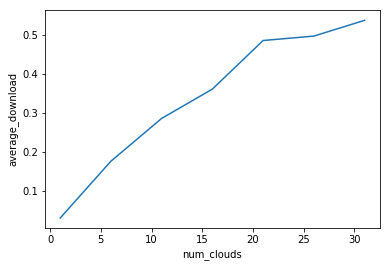

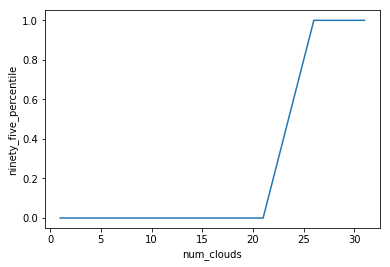

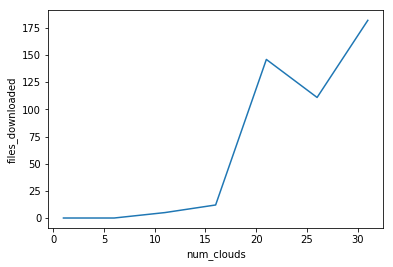

In [35]:
for column in results_df:
    if column!='num_clouds' and column!='average_latency':
        plt.xlabel('num_clouds')
        plt.ylabel(column)
        plt.plot(results_df['num_clouds'],results_df[column])
        plt.show()

NameError: name 'results_df' is not defined

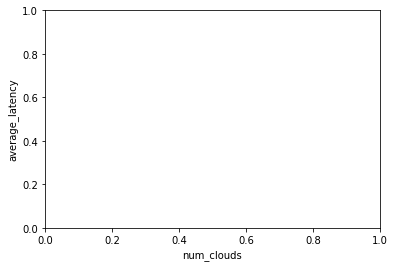

In [6]:
plt.xlabel('num_clouds')
plt.ylabel('average_latency')
df_without_nan = results_df.dropna()
plt.plot(df_without_nan['num_clouds'],df_without_nan['average_latency'])